Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/DEPI/credit_card_transactions.csv")
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
# Summary statistics
print(data.describe())

# Checking missing values
print(data.isnull().sum())

         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   6.483370e+05  4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01   
std    3.743180e+05  1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    3.241685e+05  1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01   
50%    6.483370e+05  3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01   
75%    9.725055e+05  4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean  -9.022634e+01  8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01   
std    1.375908e+01  3.019564e+05  1.284128e+07  5.

In [ ]:

data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode'],
      dtype='object')

In [ ]:
data.drop(columns=['Unnamed: 0'],inplace=True)#it's like index

In [ ]:
# corr_matrix = data.corr()
# #correlation between "is_fraud" & every Features
# print(corr_matrix['is_fraud'].sort_values(ascending=False))

In [ ]:
# Convert 'trans_date_trans_time' to datetime objects
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

# Extract numerical features from the datetime column if needed
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour

# Calculate the correlation matrix, excluding non-numeric columns
corr_matrix = data.select_dtypes(include=['number']).corr()

# Correlation between "is_fraud" and other features
print(corr_matrix['is_fraud'].sort_values(ascending=False))

is_fraud            1.000000
amt                 0.219404
transaction_hour    0.013799
city_pop            0.002136
lat                 0.001894
merch_lat           0.001741
merch_long          0.001721
long                0.001721
cc_num             -0.000981
zip                -0.002162
merch_zipcode      -0.002992
unix_time          -0.005078
Name: is_fraud, dtype: float64


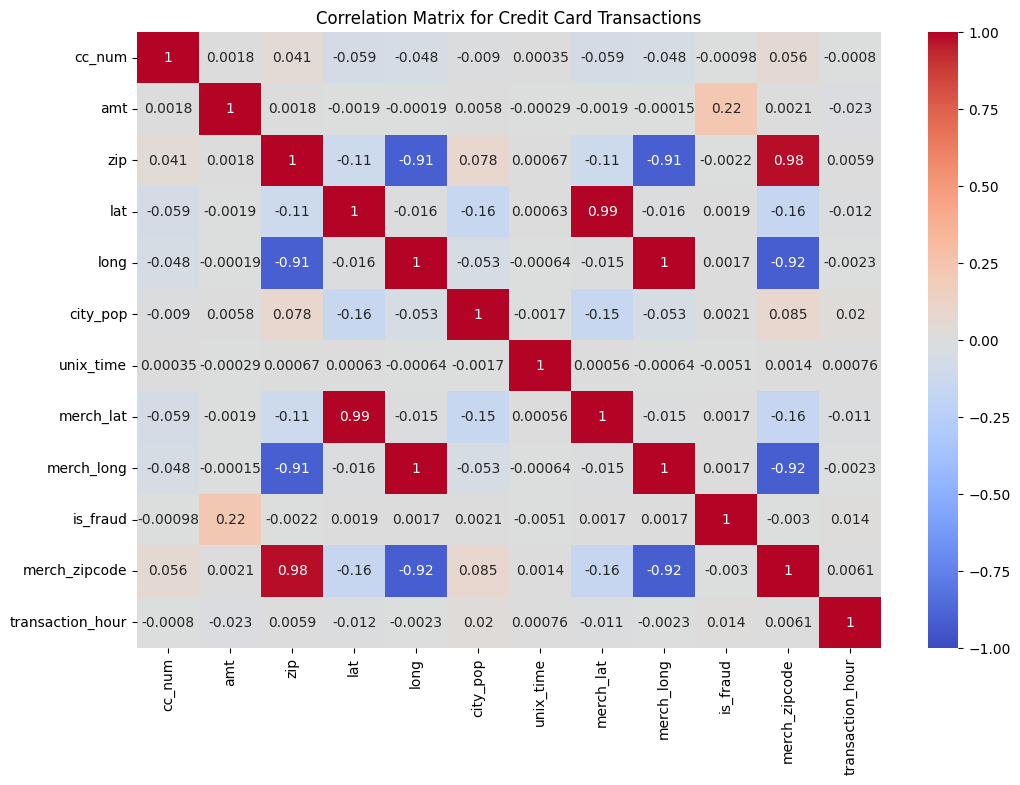

In [ ]:
# Visualizing the Correlation between Columns
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True # to print the number in square
            , cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Credit Card Transactions')
plt.show()

In [ ]:
# Drop unnecessary columns
data = data.drop(columns=['trans_date_trans_time', 'trans_num', 'unix_time', 'dob', 'first', 'last'])

In [ ]:
# fill missing values
data['merch_zipcode'].fillna(data['merch_zipcode'].mean(), inplace=True)

<ipython-input-15-cca81f3b4559>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['merch_zipcode'].fillna(data['merch_zipcode'].mean(), inplace=True)


In [ ]:
data.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,merch_zipcode,transaction_hour
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,28705.000000,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,46825.754151,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,83236.000000,0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0,46825.754151,0
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0,22844.000000,0


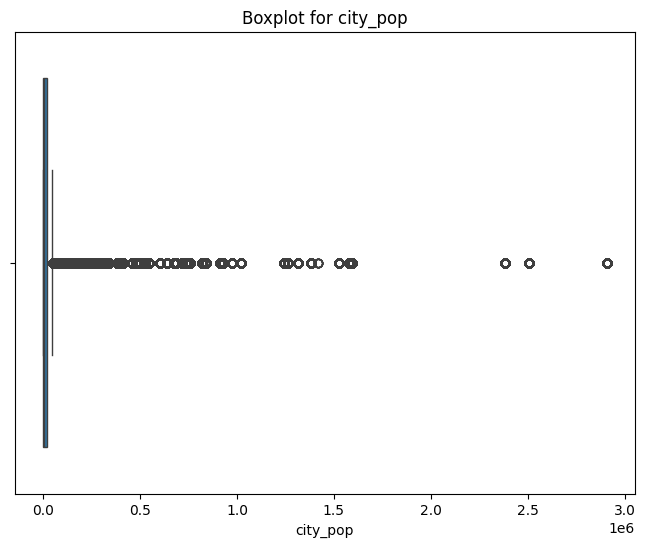

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data["city_pop"])
plt.title(f'Boxplot for {"city_pop"}')
plt.show()

In [ ]:
# Use IQR to determine the boundaries of outliers
Q1 = data["city_pop"].quantile(0.25)
Q3 = data["city_pop"].quantile(0.75)
IQR = Q3 - Q1

# Determine the upper and lower bounds for outlierslower_bound = Q1 - 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mean_value = data["city_pop"].mean()
data["city_pop"] = np.where((data["city_pop"] < lower_bound) | (data["city_pop"] > upper_bound), mean_value, data["city_pop"])

print(data["city_pop"].describe())

count    1.296675e+06
mean     2.088621e+04
std      3.360244e+04
min      2.300000e+01
25%      7.430000e+02
50%      2.456000e+03
75%      2.032800e+04
max      8.882444e+04
Name: city_pop, dtype: float64


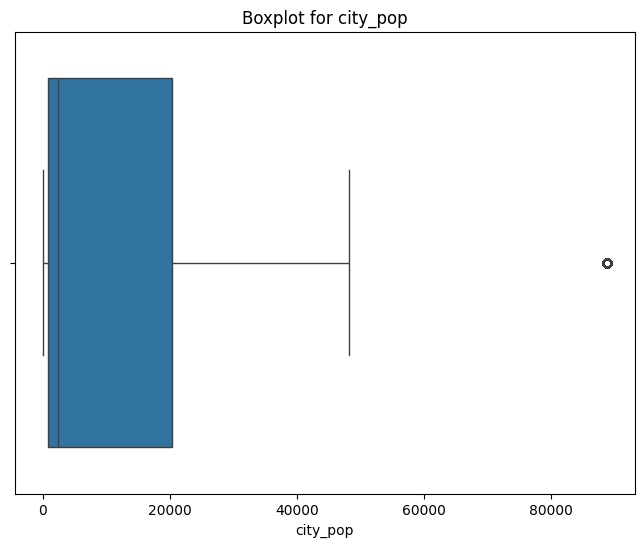

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data["city_pop"])
plt.title(f'Boxplot for {"city_pop"}')
plt.show()

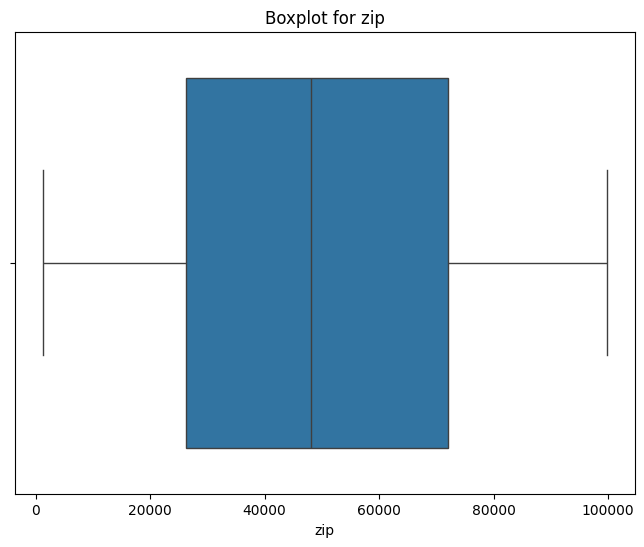

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data["zip"])
plt.title(f'Boxplot for {"zip"}')
plt.show()

In [ ]:
print("number of unique values in every columns")
for col in data.columns:
    unique_values = data[col].nunique()  # عدد التصنيفات في العمود
    print("******************************************")
    print(f'{col}: {unique_values} unique values')

number of unique values in every columns
******************************************
cc_num: 983 unique values
******************************************
merchant: 693 unique values
******************************************
category: 14 unique values
******************************************
amt: 52928 unique values
******************************************
gender: 2 unique values
******************************************
street: 983 unique values
******************************************
city: 894 unique values
******************************************
state: 51 unique values
******************************************
zip: 970 unique values
******************************************
lat: 968 unique values
******************************************
long: 969 unique values
******************************************
city_pop: 733 unique values
******************************************
job: 494 unique values
******************************************
merch_lat: 1247805 unique values

<ipython-input-22-d1ac7c2419c3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data , x='category', palette='coolwarm')#palette for color


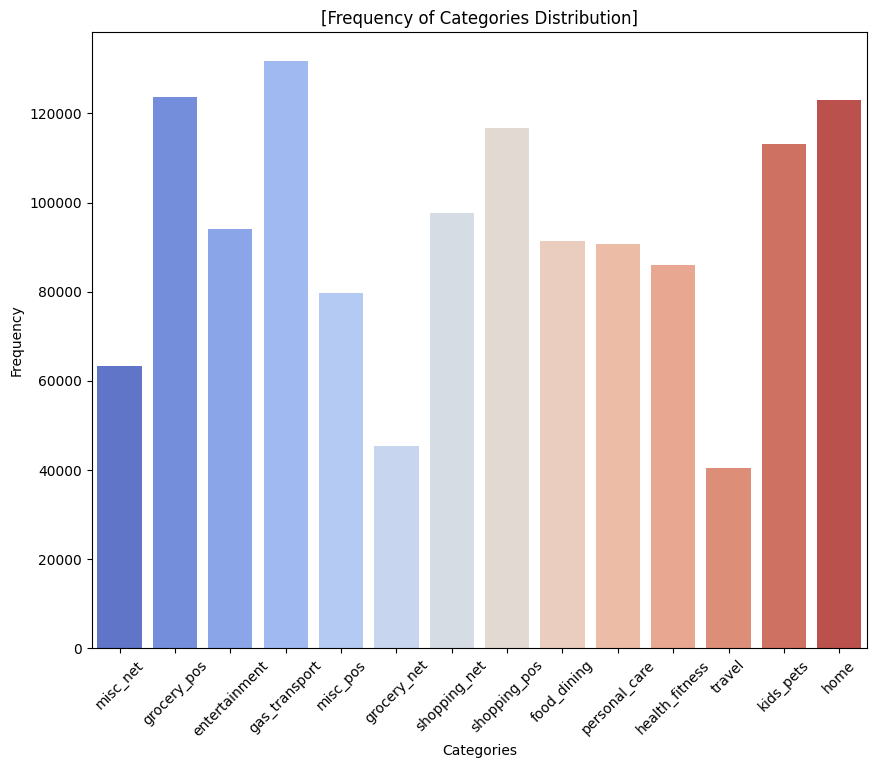

In [ ]:
#plot column "category"
plt.figure(figsize=[10,8])
sns.countplot(data=data , x='category', palette='coolwarm')#palette for color
plt.xticks(rotation=45)#rotation words on x axis
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('[Frequency of Categories Distribution]')
plt.show()

In [ ]:
#List of columns you want to encode
categorical_columns = ['category', 'gender', 'street', 'city', 'state', 'job','merchant']

# create object LabelEncoder
encoder = LabelEncoder()

# Apply the encoding to each column in the list
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

In [ ]:

data.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,merch_zipcode,transaction_hour
0,2703186189652095,514,8,4.97,0,568,526,27,28654,36.0788,-81.1781,3495.0,370,36.011293,-82.048315,0,28705.000000,0
1,630423337322,241,4,107.23,0,435,612,47,99160,48.8878,-118.2105,149.0,428,49.159047,-118.186462,0,46825.754151,0
2,38859492057661,390,0,220.11,1,602,468,13,83252,42.1808,-112.2620,4154.0,307,43.150704,-112.154481,0,83236.000000,0
3,3534093764340240,360,2,45.00,1,930,84,26,59632,46.2306,-112.1138,1939.0,328,47.034331,-112.561071,0,46825.754151,0
4,375534208663984,297,9,41.96,1,418,216,45,24433,38.4207,-79.4629,99.0,116,38.674999,-78.632459,0,22844.000000,0


In [ ]:
# Split data to Features & Target
X = data.drop(columns=['is_fraud'])
y = data['is_fraud']

In [ ]:
#Transform the data to values close to each other
columns = X.columns #save names of columns X in Variable "columns"
standerScaler = StandardScaler()
X = standerScaler.fit_transform(X)

In [ ]:
#transform X to DataFrame
X_scaled = pd.DataFrame(X, columns=columns)

In [ ]:
X_scaled.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,merch_zipcode,transaction_hour
0,-0.316692,0.851654,0.452853,-0.407826,-0.909206,0.285529,0.312207,0.022519,-0.749136,-0.484420,0.657620,-0.517558,0.848099,-0.494354,0.593864,-7.613169e-01,-1.878145
1,-0.318757,-0.506880,-0.569266,0.230039,-0.909206,-0.189368,0.644767,1.418098,1.872567,2.039120,-2.033870,-0.617134,1.262061,2.078699,-2.030341,-3.056887e-16,-1.878145
2,-0.318728,0.234591,-1.591384,0.934149,1.099861,0.406932,0.087922,-0.954386,1.281042,0.717754,-1.601537,-0.497947,0.398450,0.902849,-1.592323,1.529723e+00,-1.878145
3,-0.316058,0.085302,-1.080325,-0.158132,1.099861,1.578106,-1.396996,-0.047260,0.402753,1.515617,-1.590766,-0.563864,0.548333,1.662886,-1.621848,-3.056887e-16,-1.878145
4,-0.318471,-0.228206,0.708382,-0.177094,1.099861,-0.250069,-0.886556,1.278540,-0.906090,-0.023035,0.782279,-0.618622,-0.964771,0.026941,0.841909,-1.007558e+00,-1.878145


#imbalanced data problem

In [ ]:
class_distribution = y.value_counts()

In [ ]:
print("Class Distribution:")
print(class_distribution)

Class Distribution:
is_fraud
0    1289169
1       7506
Name: count, dtype: int64


In [ ]:
imbalance_ratio = max(class_distribution) / min(class_distribution)
print("Imbalance Ratio:", imbalance_ratio)

Imbalance Ratio: 171.75179856115108


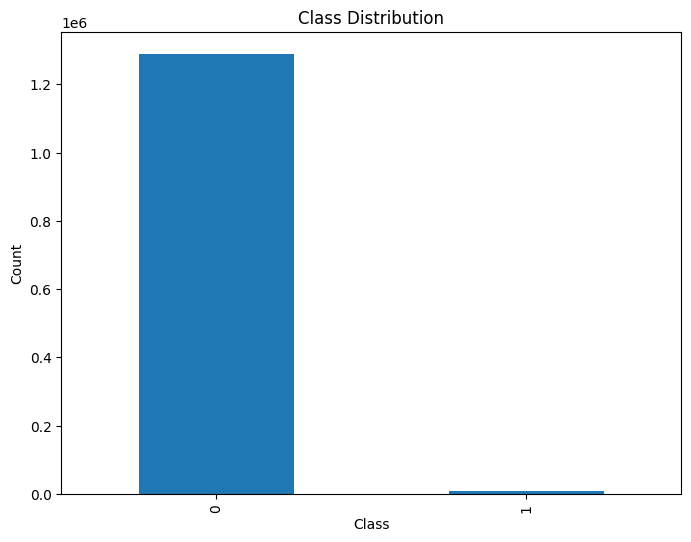

In [ ]:
# Visualize the class distribution (optional)
plt.figure(figsize=(8, 6))
class_distribution.plot(kind="bar")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [ ]:
# Resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
print("Class Distribution after SMOTE:")
data_after_resample = pd.Series(y_resampled).value_counts()
print(data_after_resample)

Class Distribution after SMOTE:
is_fraud
0    1289169
1    1289169
Name: count, dtype: int64


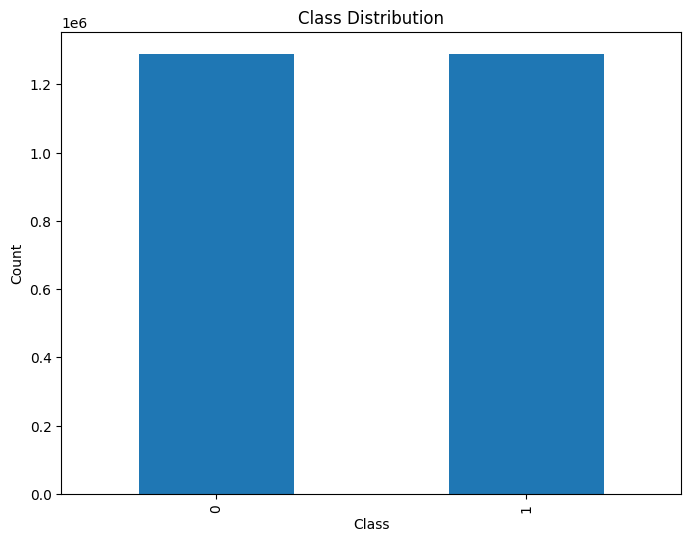

In [ ]:
 #Visualize the class distribution (optional)
plt.figure(figsize=(8, 6))
data_after_resample.plot(kind="bar")
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

#Split data

In [ ]:
#!pip install scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#DT Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(max_depth=5)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
y_train_pred = dt.predict(X_train)

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)

In [ ]:
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9971436558891009


In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Test accuracy:", accuracy)

Test accuracy: 0.9970771396070719


In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[257691,    124],
       [   634,    886]])

In [ ]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.5828947368421052


In [ ]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.8772277227722772


In [ ]:
f1_score = f1_score(y_test, y_pred)
print("Precision:", f1_score)

Precision: 0.700395256916996
